In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [3]:
data = pd.read_csv ('water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [4]:
rcParams['figure.figsize'] = 13,6

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


<AxesSubplot:title={'center':'Correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

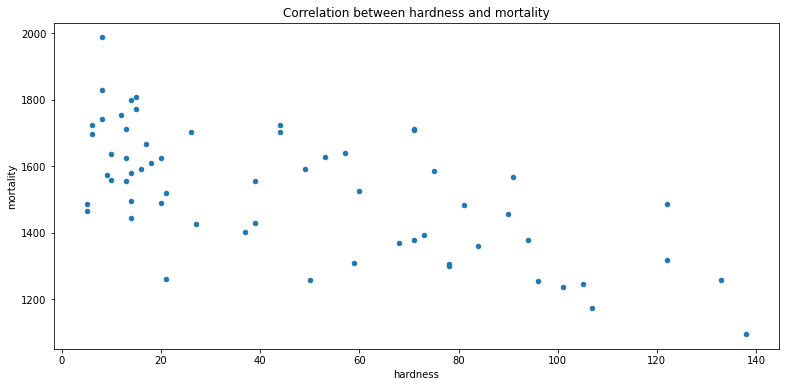

In [6]:
data.plot (kind = 'scatter', x = 'hardness', y = 'mortality', title = 'Correlation between hardness and mortality')

In [7]:
# по точечному графику можно предположить обратную связь

In [8]:
# рассчитаем коэффициент корреляции Пирсона. Получаем достаточно заметную обратную зависимость

In [9]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [10]:
# рассчитаем коэфициент корреляции Спирмана. Чуть ниже. Но все равно видно обратную зависимость

In [11]:
data[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X = data[['hardness']]
Y = data['mortality']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [15]:
X_train.shape

(42, 1)

In [16]:
Y_train.shape

(42,)

In [17]:
# обучем модель 

In [18]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
model.coef_

array([-3.13167087])

In [20]:
model.intercept_

1668.9722977277095

In [21]:
Y_pred = model.predict(X_test)
Y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [22]:
# посчитаем коэф детерминации. Достаточно средняя по качеству модель, так как по одному значению сложно спрогнозировать другое значение

In [23]:
model.score(X_test, Y_test)

0.5046490611017092

In [24]:
# визуализируем прогноз и факт

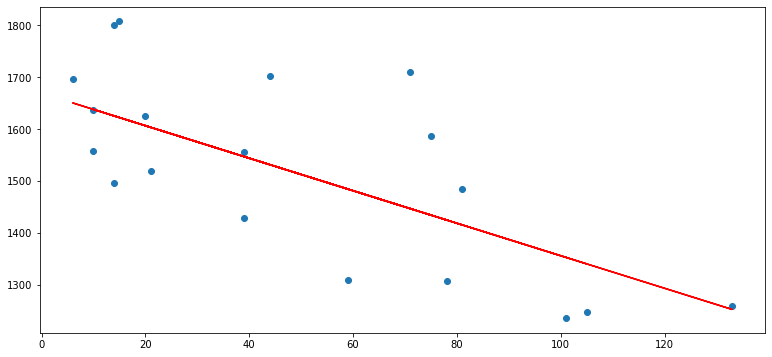

In [25]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, c = 'r')

In [26]:
# разделим данные на две группы

In [27]:
data['location'].unique()

array(['South', 'North'], dtype=object)

In [29]:
# Северные города
fitered_north = data[(data['location']== 'North')]
fitered_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:title={'center':'Correlation between hardness and mortality in the North cities'}, xlabel='hardness', ylabel='mortality'>

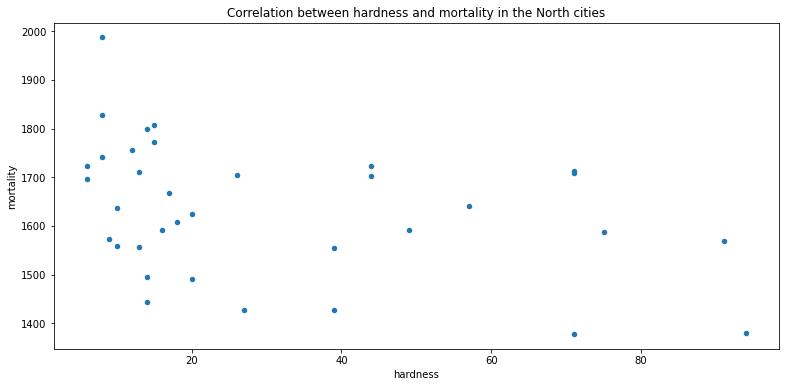

In [30]:
fitered_north.plot (kind = 'scatter', x = 'hardness', y = 'mortality', title = 'Correlation between hardness and mortality in the North cities')

In [31]:
# по точечному графику есть небольшая обратная связь. Но не очень очевидная. 

In [32]:
# рассчитаем коэффициент корреляции Пирсона. Коэфициент достаточно низкий. Обратная зависимость слабая

In [33]:
fitered_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [34]:
# рассчитаем коэфициент корреляции Спирмана. Обратная зависимость слабая

In [35]:
fitered_north[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [36]:
XN = data[['hardness']]
YN = data['mortality']

In [37]:
XN_train, XN_test, YN_train, YN_test = train_test_split(XN, YN, test_size = 0.30, random_state = 42)

In [38]:
XN_train.shape

(42, 1)

In [39]:
YN_train.shape

(42,)

In [40]:
# Обучаем модель

In [42]:
model_north = LinearRegression()
model_north.fit(XN_train, YN_train)

LinearRegression()

In [43]:
model_north.coef_

array([-3.13167087])

In [44]:
model_north.intercept_

1668.9722977277095

In [45]:
Y_pred_north = model_north.predict(XN_test)
Y_pred_north

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [46]:
# посчитаем коэф детерминации. 
#Достаточно средняя по качеству модель, так как по одному значению сложно спрогнозировать другое значение

In [47]:
model_north.score(XN_test, YN_test)

0.5046490611017092

In [48]:
# визуализируем прогноз и факт

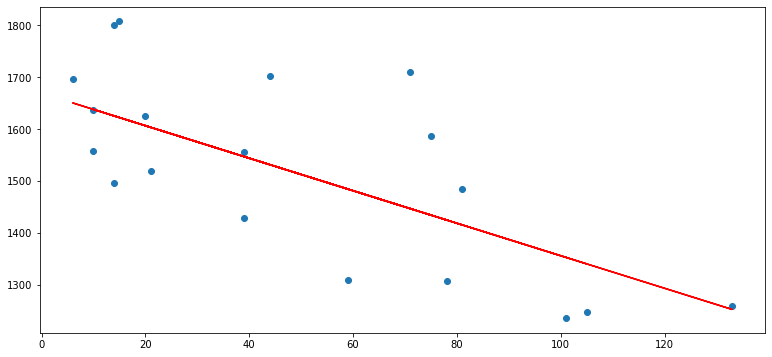

In [49]:
plt.scatter(XN_test, YN_test)
plt.plot(XN_test, Y_pred_north, c = 'r')

In [50]:
# Южные города

In [51]:
fitered_south = data[(data['location']== 'South')]
fitered_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:title={'center':'Correlation between hardness and mortality in the South cities'}, xlabel='hardness', ylabel='mortality'>

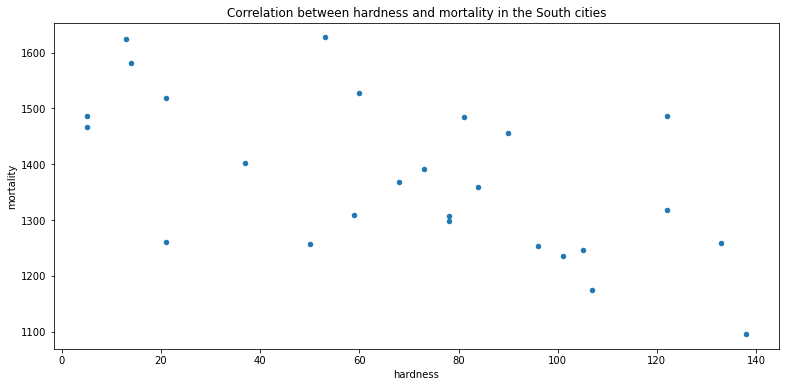

In [52]:
fitered_south.plot (kind = 'scatter', x = 'hardness', y = 'mortality', title = 'Correlation between hardness and mortality in the South cities')

In [53]:
# по точечному графику есть небольшая обратная связь. Еще меньше, чем у северных городов

In [54]:
# рассчитаем коэффициент корреляции Пирсона. Коэфициент средний, но обратная зависимость есть. 

In [55]:
fitered_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [56]:
# рассчитаем коэфициент корреляции Спирмана. Практически не отличается от Спирмена. Средняя обратная зависимость
fitered_south[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [57]:
XS = data[['hardness']]
YS = data['mortality']

In [58]:
XS_train, XS_test, YS_train, YS_test = train_test_split(XS, YS, test_size = 0.30, random_state = 42)

In [59]:
# Обучаем модель
model_south = LinearRegression()
model_south.fit(XS_train, YS_train)

LinearRegression()

In [60]:
model_south.coef_

array([-3.13167087])

In [61]:
model_south.intercept_

1668.9722977277095

In [62]:
Y_pred_south = model_south.predict(XS_test)
Y_pred_south

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [63]:
# посчитаем коэф детерминации. 
#Достаточно средняя по качеству модель, так как по одному значению сложно спрогнозировать другое значение
model_south.score(XS_test, YS_test)

0.5046490611017092

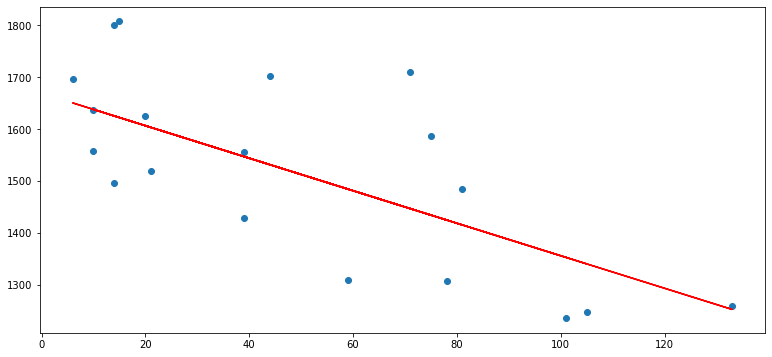

In [64]:
# визуализируем прогноз и факт
plt.scatter(XS_test, YS_test)
plt.plot(XS_test, Y_pred_south, c = 'r')